# Part II -Ford GoBike Dataset Exploartion
## by Nada AbuIssa

## Investigation Overview


> The investigation delves into the seasonality trends within bike-sharing data, aiming to uncover patterns in ridership behavior across different temporal dimensions. By analyzing variations in user activity levels based on days of the month and hours of the day.


## Dataset Overview and Executive Summary

> The dataset contains information on bike-sharing usage, encompassing variables such as user demographics, and subscription types. Analysis reveals distinct seasonality patterns, indicating fluctuations in ridership levels across weekdays, weekends, and various times of the day. Noteworthy insights include the prevalence of commuting-related rides during peak hours, differing behaviors between subscriber and customer segments, and age-specific trends among cyclists.


In [24]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [25]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('fordgobike_clean.csv')

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173466 entries, 0 to 173465
Data columns (total 21 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             173466 non-null  int64  
 1   start_time               173466 non-null  object 
 2   end_time                 173466 non-null  object 
 3   start_station_id         173466 non-null  float64
 4   start_station_name       173466 non-null  object 
 5   start_station_latitude   173466 non-null  float64
 6   start_station_longitude  173466 non-null  float64
 7   end_station_id           173466 non-null  float64
 8   end_station_name         173466 non-null  object 
 9   end_station_latitude     173466 non-null  float64
 10  end_station_longitude    173466 non-null  float64
 11  bike_id                  173466 non-null  int64  
 12  user_type                173466 non-null  object 
 13  member_birth_year        173466 non-null  int64  
 14  memb

In [27]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,duration_min,member_age,start_day,start_weekday,start_hour
0,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,...,4898,Subscriber,1974,Male,Yes,26.425417,50,28,Thursday,23
1,1147,2019-02-28 23:55:35.104,2019-03-01 00:14:42.588,300.0,Palm St at Willow St,37.317298,-121.884995,312.0,San Jose Diridon Station,37.329732,...,3803,Subscriber,1983,Female,No,19.124733,41,28,Thursday,23
2,1615,2019-02-28 23:41:06.766,2019-03-01 00:08:02.756,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,...,6329,Subscriber,1989,Male,No,26.933167,35,28,Thursday,23
3,1570,2019-02-28 23:41:48.790,2019-03-01 00:07:59.715,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,...,6548,Subscriber,1988,Other,No,26.182083,36,28,Thursday,23
4,1049,2019-02-28 23:49:47.699,2019-03-01 00:07:17.025,19.0,Post St at Kearny St,37.788975,-122.403452,121.0,Mission Playground,37.759210,...,6488,Subscriber,1992,Male,No,17.488767,32,28,Thursday,23


## The most frequents days in the week and the month

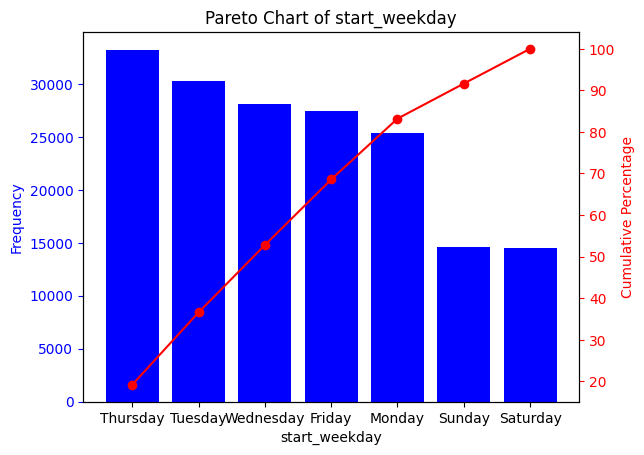

In [28]:
def pareto(data, column):
    # Count the number of occurrences of each value
    counts = data[column].value_counts()
    
    # Calculate the cumulative percentage of the values
    cumulative_percents = 100 * counts.cumsum() / counts.sum()
    
    # Create the Pareto chart
    fig, ax1 = plt.subplots()
    ax1.bar(counts.index, counts, color='b')
    ax1.set_xlabel(column)
    ax1.set_ylabel('Frequency', color='b')
    ax1.tick_params('y', colors='b')
    
    ax2 = ax1.twinx()
    ax2.plot(counts.index, cumulative_percents, color='r', marker='o')
    ax2.set_ylabel('Cumulative Percentage', color='r')
    ax2.tick_params('y', colors='r')
    
    plt.title('Pareto Chart of ' + column)
    plt.xticks(rotation=90)
    plt.show()

pareto(df, 'start_weekday')

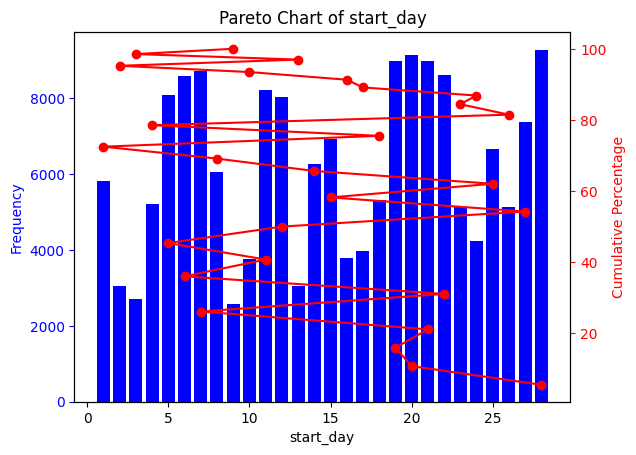

In [29]:
pareto(df, 'start_day')

## Active hours of the day

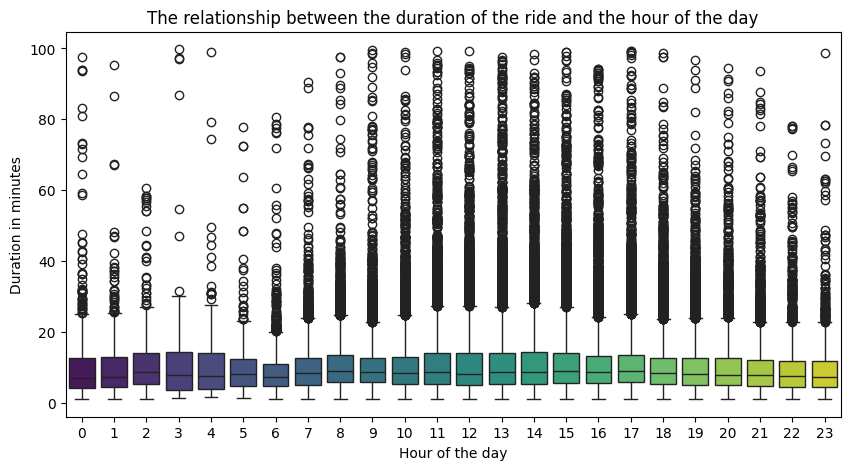

In [30]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='start_hour', y='duration_min', palette='viridis')
plt.title('The relationship between the duration of the ride and the hour of the day')
plt.xlabel('Hour of the day')
plt.ylabel('Duration in minutes')
plt.show()

<Figure size 1000x500 with 0 Axes>

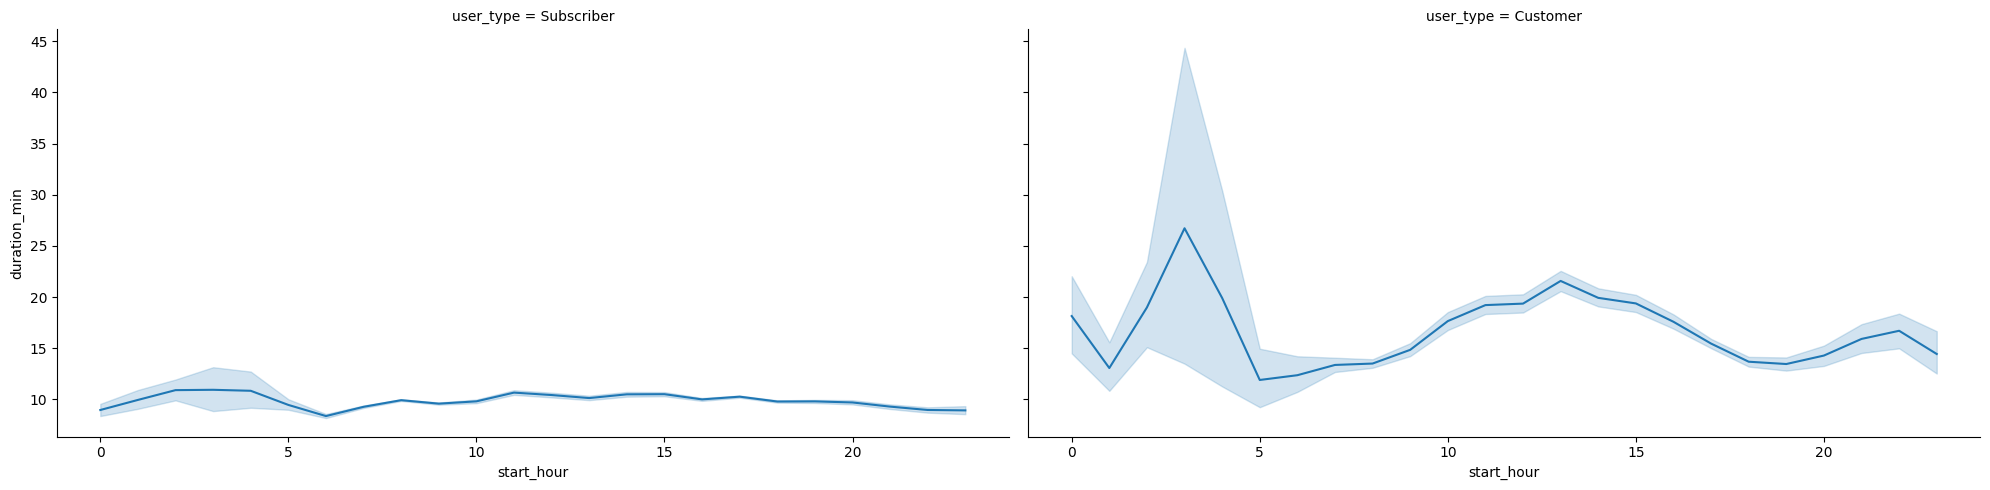

In [31]:
def facetplot(x, y, **kwargs):
    sns.lineplot(x=x, y=y, **kwargs)
    
plt.figure(figsize=(10, 5))
g = sns.FacetGrid(data=df, col='user_type', height=5, aspect=2)
g.map(facetplot, 'start_hour', 'duration_min')

plt.show()

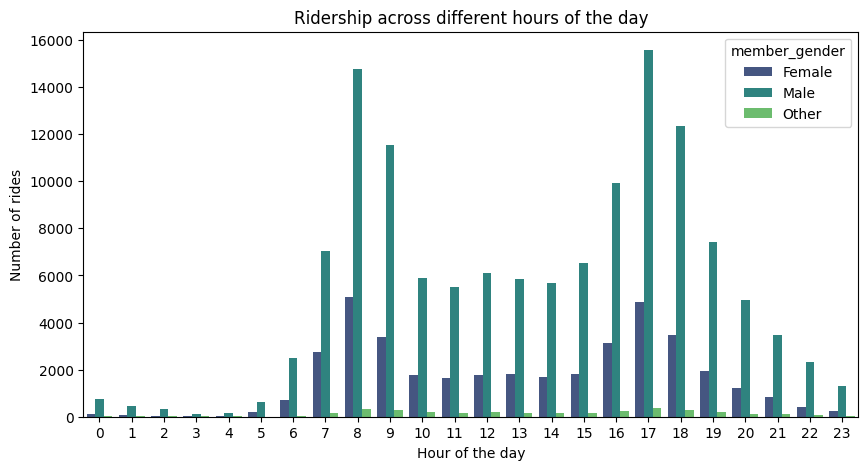

In [32]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='start_hour', hue='member_gender',palette='viridis')
plt.title('Ridership across different hours of the day')
plt.xlabel('Hour of the day')
plt.ylabel('Number of rides')
plt.show()

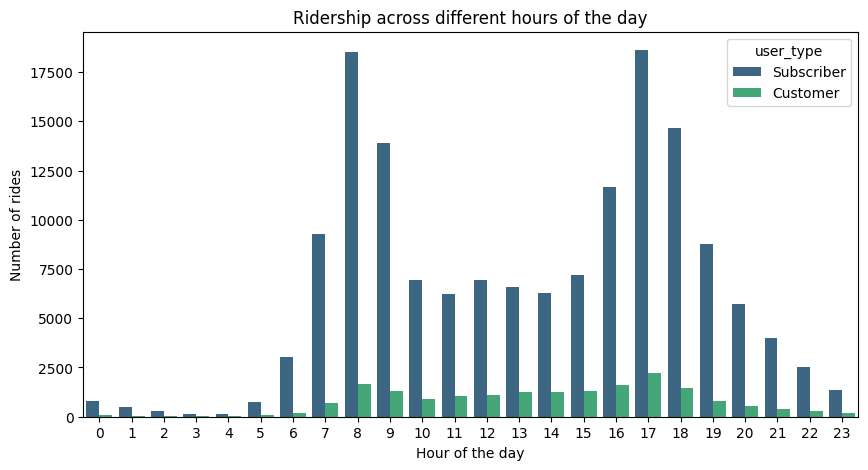

In [33]:
# ridership across different hours of the day and user type
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='start_hour', hue='user_type',palette='viridis')
plt.title('Ridership across different hours of the day')
plt.xlabel('Hour of the day')
plt.ylabel('Number of rides')
plt.show()

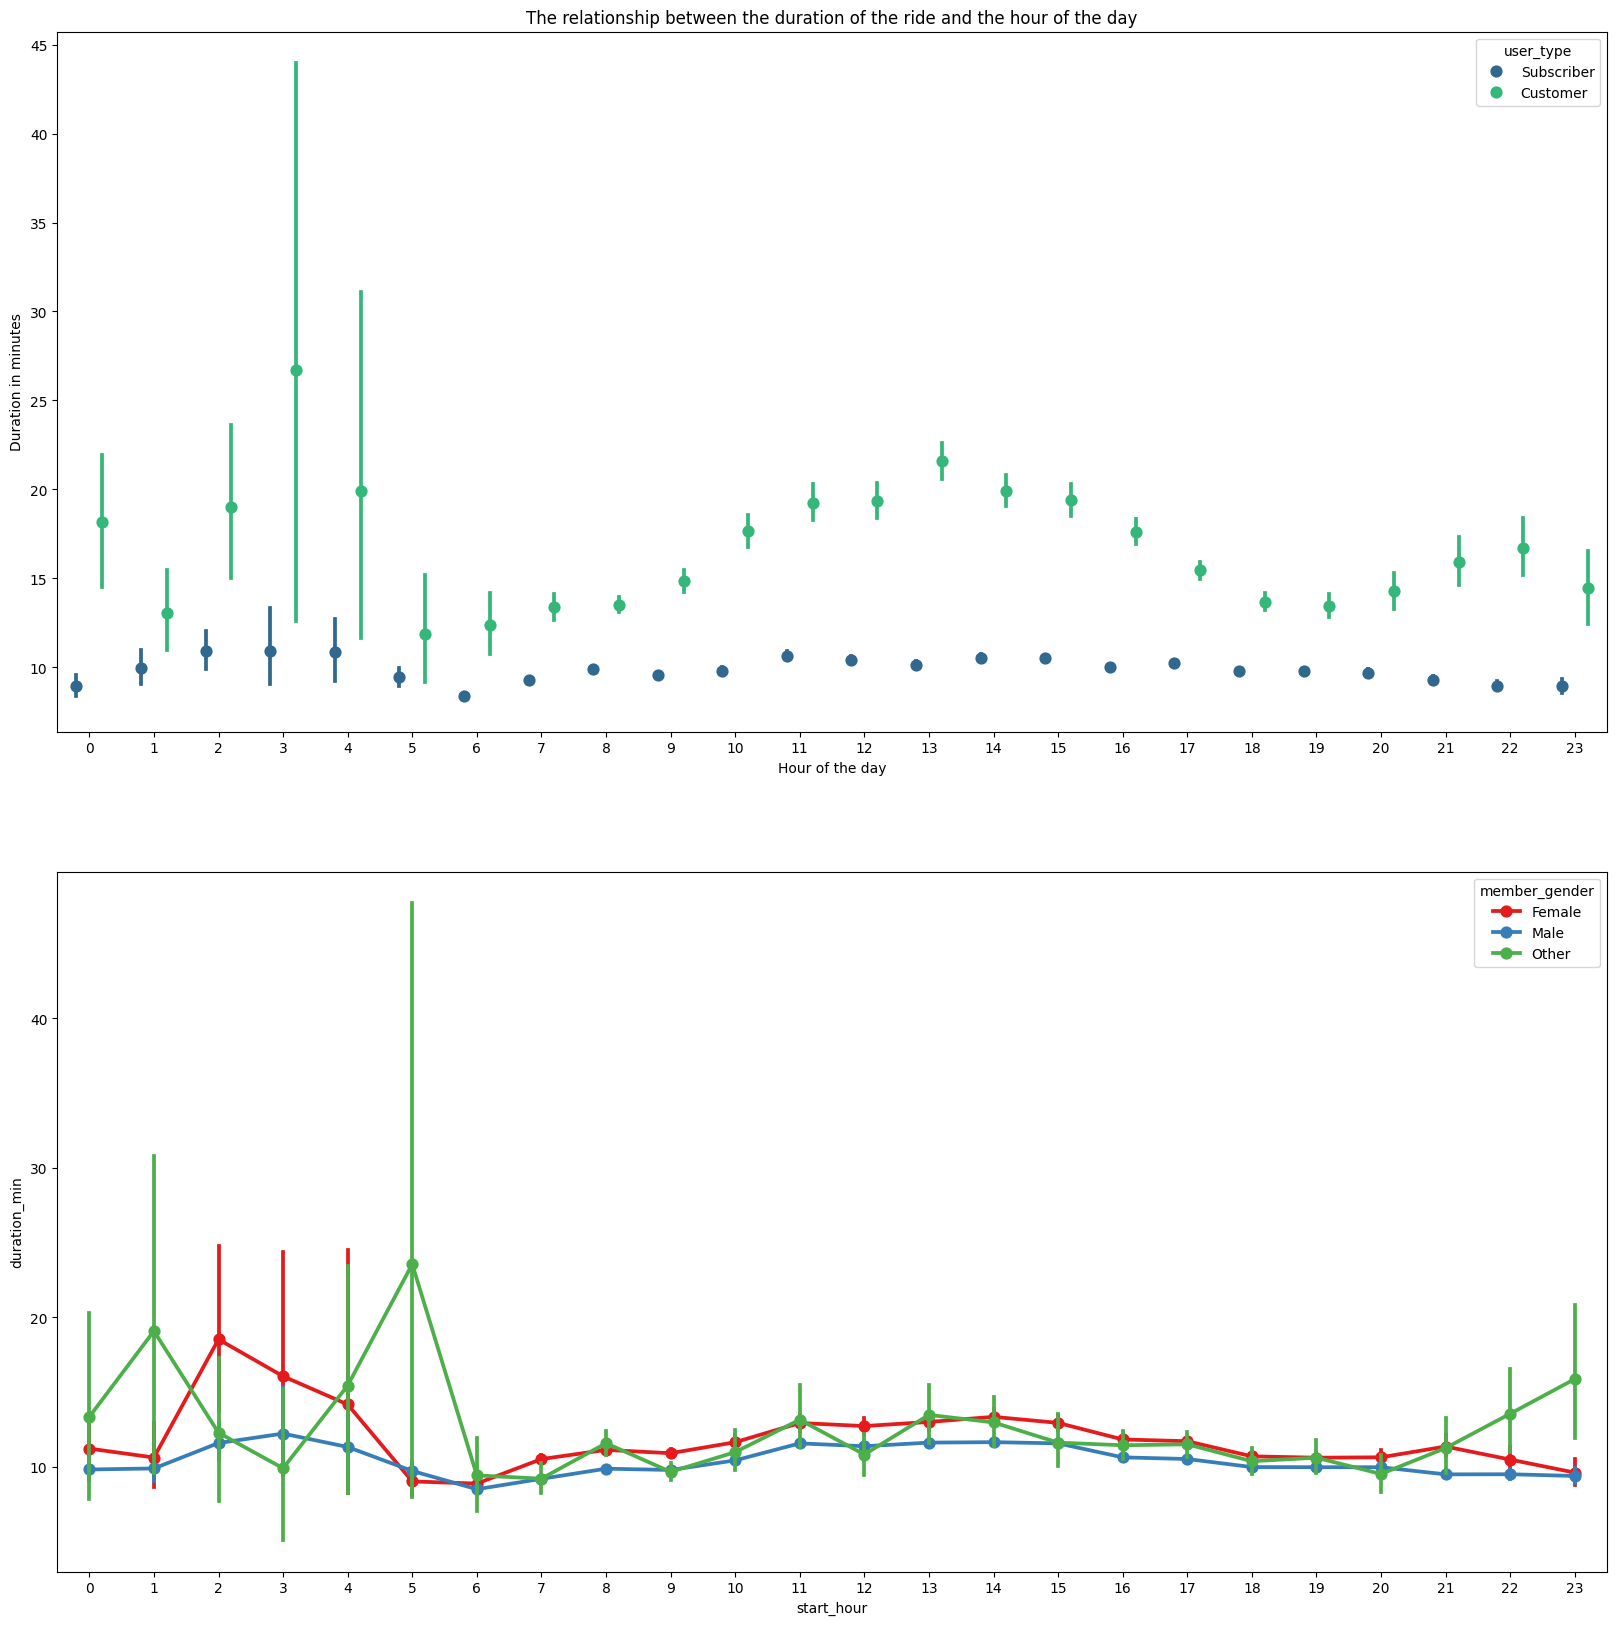

In [34]:
plt.figure(figsize = [20,20])

plt.subplot(2, 1, 1)
sns.pointplot(data = df, x = 'start_hour', y = 'duration_min', hue = 'user_type', palette = 'viridis', linestyles = '', dodge = 0.4)
plt.title('The relationship between the duration of the ride and the hour of the day')
plt.xlabel('Hour of the day')
plt.ylabel('Duration in minutes')

plt.subplot(2, 1, 2)
sns.pointplot(data = df, x = 'start_hour', y = 'duration_min', hue='member_gender', palette = 'Set1');


## Ridership across different days of the month 

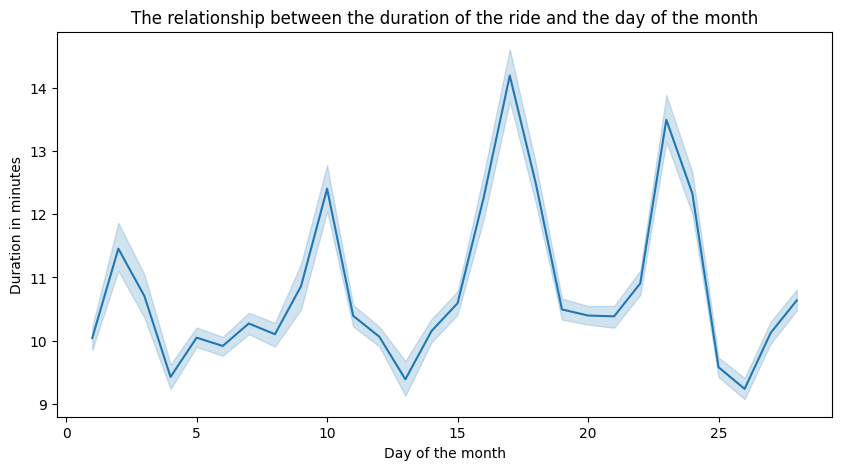

In [35]:
# line plot of the duration of the ride across different days of the month
plt.figure(figsize=(10, 5))
sns.lineplot(data=df, x='start_day', y='duration_min', palette='viridis')
plt.title('The relationship between the duration of the ride and the day of the month')
plt.xlabel('Day of the month')
plt.ylabel('Duration in minutes')

plt.show()

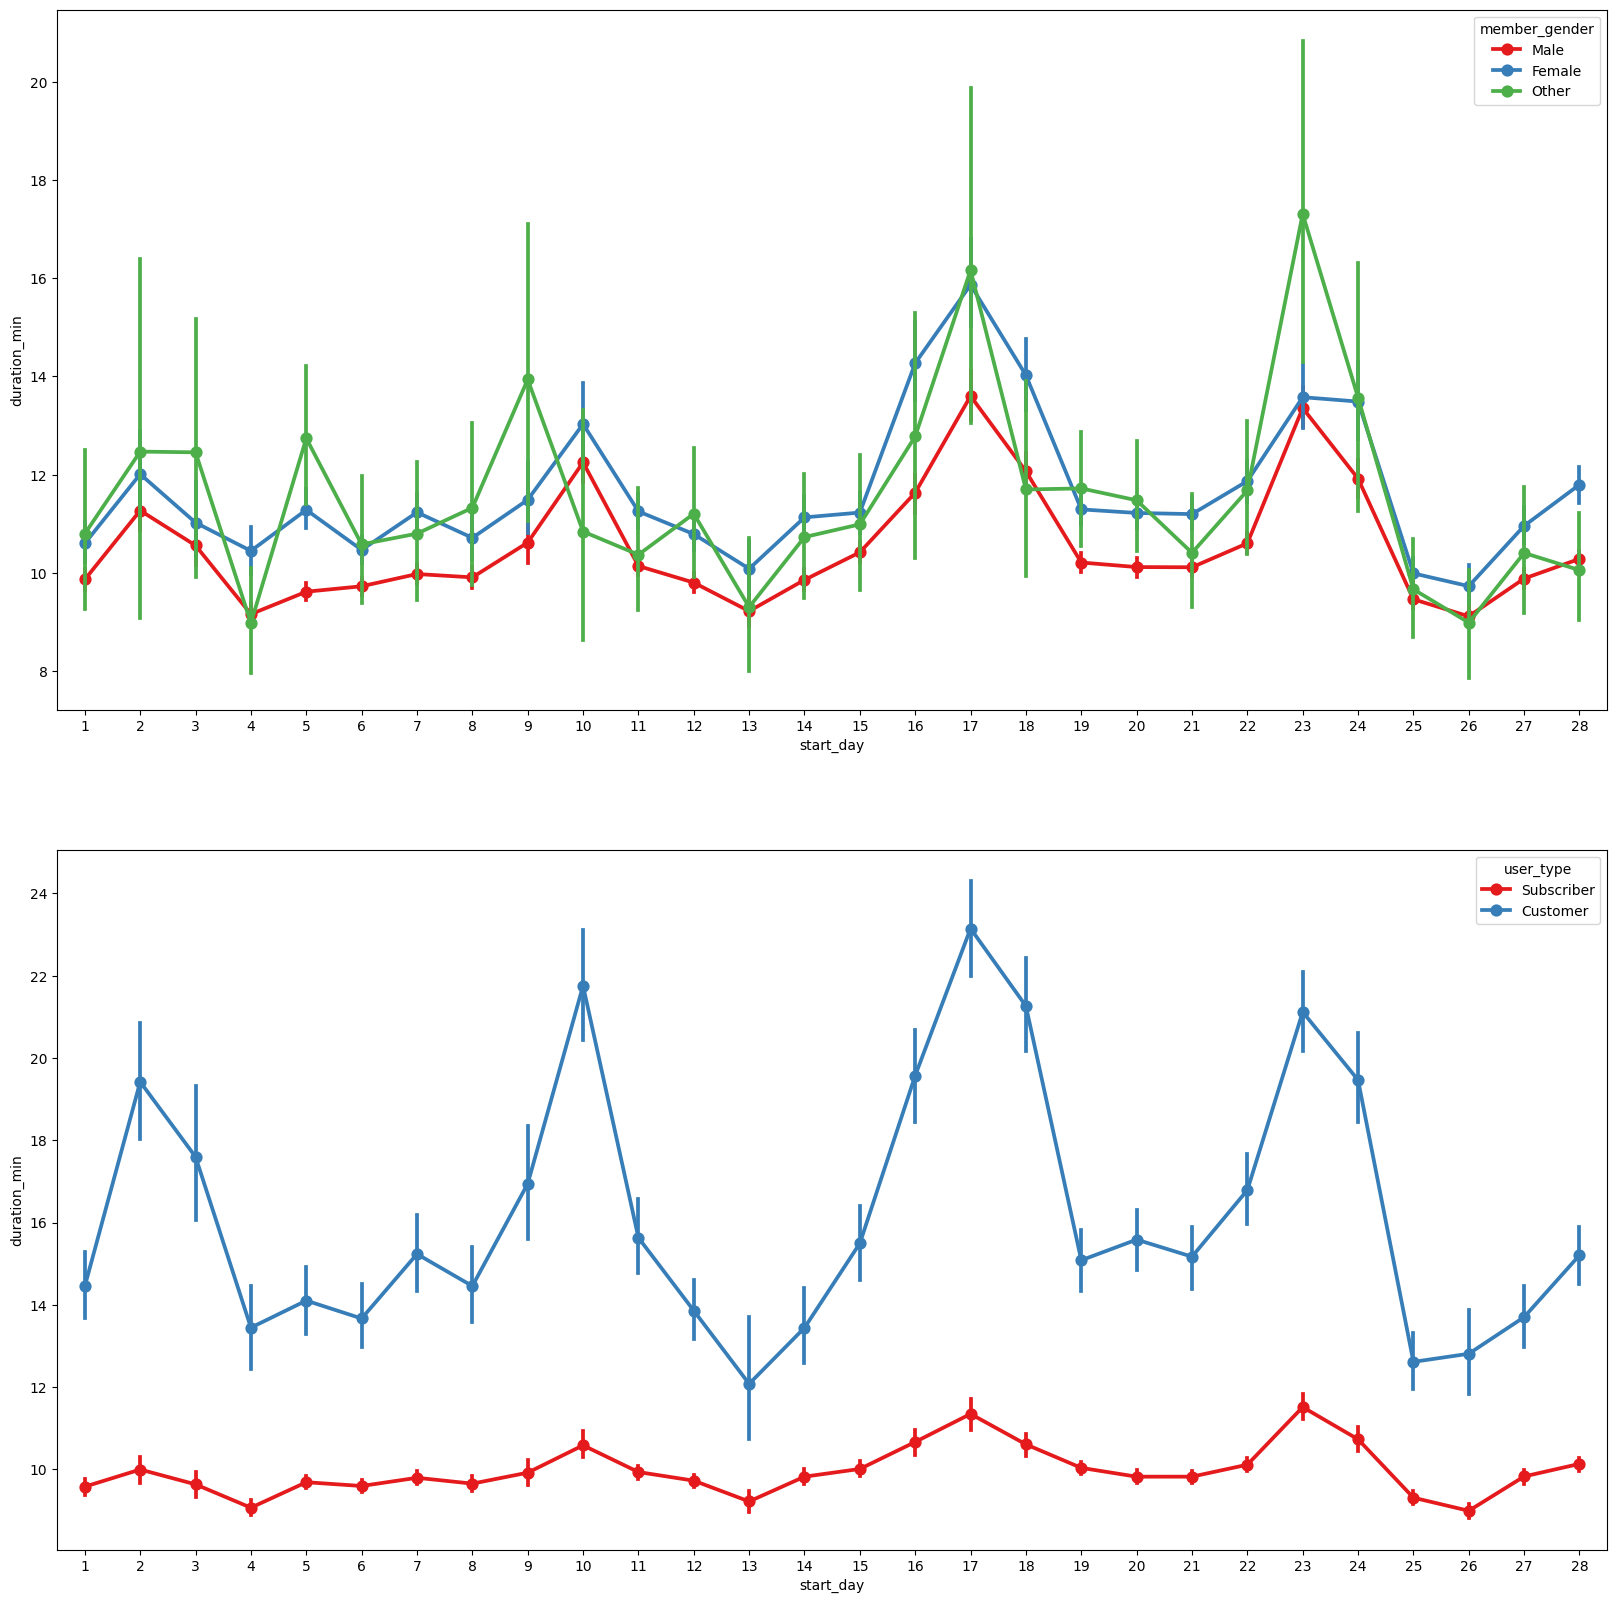

In [36]:
plt.figure(figsize = [20,20])


plt.subplot(2, 1, 1)
sns.pointplot(data = df, x = 'start_day', y = 'duration_min', hue='member_gender', palette = 'Set1');

plt.subplot(2, 1, 2)
sns.pointplot(data = df, x = 'start_day', y = 'duration_min', hue='user_type', palette = 'Set1');


plt.show()

In [37]:
# convert the Part_II_explanatory_template.ipynb to pdf
!jupyter nbconvert --to html Part_II_explanatory_template.ipynb

[NbConvertApp] Converting notebook Part_II_explanatory_template.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 9 image(s).
[NbConvertApp] Writing 1264252 bytes to Part_II_explanatory_template.html
